In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import sklearn.decomposition
import matplotlib.pyplot as plt

In [16]:
class PCA:
    def __init__(self, n_components = 2):
        self.n_components = n_components
    
    def normalize(self, X):
        feature_mean = X.mean(axis = 1)
        norm_X = X - feature_mean.reshape((feature_mean.shape[0], 1))
        return norm_X
    
    def fit(self, X):
        # 输入样本矩阵先转置
        self.X = X.T
        # n为特征数, m为样本数
        self.n, self.m = self.X.shape
        self.X = self.normalize(self.X)
        X_c = 1 / (np.sqrt(self.n - 1)) * self.X.T
        self.u, self.s, self.vh = np.linalg.svd(X_c)
        
    def transform(self, X):
        principal_component = self.vh[:self.n_components,:] @ X.T
        return principal_component.T

(150, 4) (150,)


D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


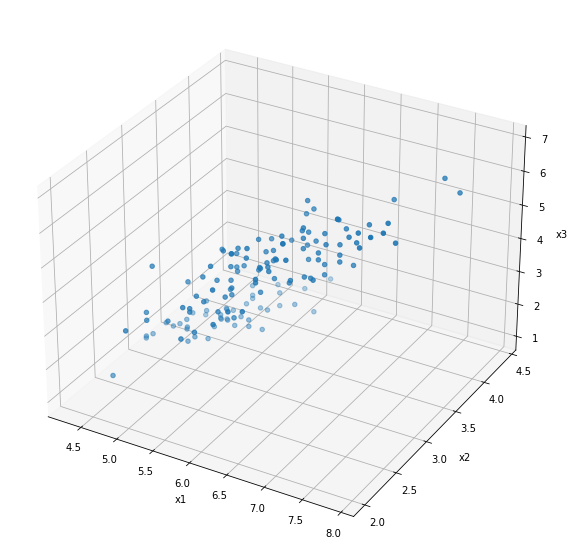

In [32]:
data = load_iris()
X, y = data.data, data.target
print(X.shape, y.shape)
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')
ax.scatter(X[:,0], X[:,1], X[:, 2])
ax.set(xlabel = 'x1', ylabel = 'x2', zlabel = 'x3')
plt.show()

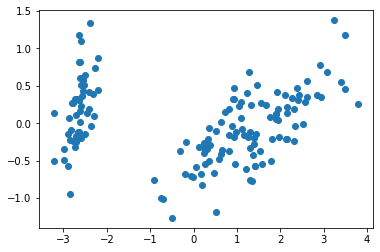

In [27]:
sk_model = sklearn.decomposition.PCA(n_components = 2)
sk_model.fit(X)
new_X = sk_model.transform(X)
plt.scatter(new_X[:,0], new_X[:,1])

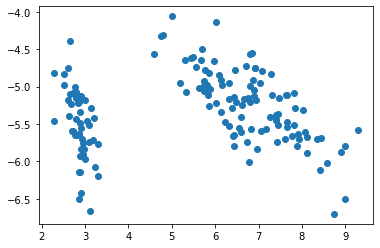

In [24]:
model = PCA(n_components = 2)
model.fit(X)
new_X = model.transform(X)
plt.scatter(new_X[:,0], new_X[:,1])

[[-11.18033989]
 [ -2.23606798]
 [  2.23606798]
 [  6.70820393]
 [ 20.1246118 ]]


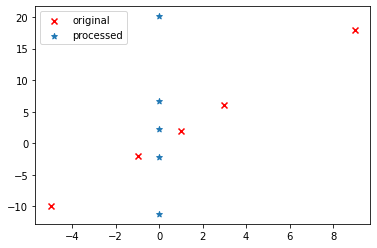

In [47]:
x_arr = np.array([[-5,-10],
                [-1,-2],
                [1,2],
                [3,6],
                [9,18]])
model = PCA(n_components = 1)
model.fit(x_arr)
new_X = model.transform(x_arr)
print(new_X)
plt.scatter(x_arr[:,0], x_arr[:,1], c = 'r', marker = 'x', label = 'original')
plt.scatter(np.zeros(new_X.shape[0]), new_X, marker = '*', label = 'processed')
plt.legend()

[[-14.31083506]
 [ -5.36656315]
 [ -0.89442719]
 [  3.57770876]
 [ 16.99411663]]


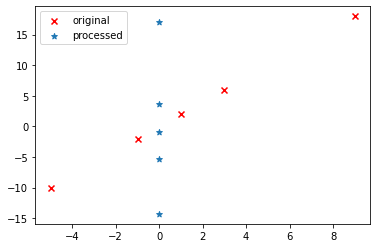

In [48]:
x_arr = np.array([[-5,-10],
                [-1,-2],
                [1,2],
                [3,6],
                [9,18]])
model = sklearn.decomposition.PCA(n_components = 1)
model.fit(x_arr)
new_X = model.transform(x_arr)
print(new_X)
plt.scatter(x_arr[:,0], x_arr[:,1], c = 'r', marker = 'x', label = 'original')
plt.scatter(np.zeros(new_X.shape[0]), new_X, marker = '*', label = 'processed')
plt.legend()